# MSc in AI 
# CE6002 & CS5062 Etivity 1 - EDA & The Learning Problem

## Student Name: Mark Murnane
## Student ID: 18195326

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

## Task 1

### Data Load

Load *bank_et1.csv* into a Pandas dataframe and conduct some basic data exploration.

Examine the first few data rows and last few data rows.

In [2]:
dataframe = pd.read_csv('bank_et1.csv', header=0, index_col=0)
dataframe.head() # Defaults to 5 if no value specified

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [3]:
dataframe.tail()

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes




### Target Variable

_Identify an attribute that can be the target variable for 2-class classification._

For a target variable to be useful in 2-class classification, it should be:
 - Something that is categorical in nature.
 - An attribute with 2 values
 - Have no missing values in the sample space

Examining the categorical data using the `describe()` method will yield a count of the unique values in the categorical data, and a textual representation of the distribution of values.  We have to specify that we want non-numeric data for this call to `describe()`.

In [4]:
# Describe the categorical attributes.  The unique value count is important here.
dataframe.describe(exclude=[np.number])

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,1990,2000,1896,2000,2000,2000,1809,2000,1546,2000
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,no,no,cellular,feb,failure,no
freq,461,1111,995,1985,1037,1750,1663,404,955,1000


From the data above there are only 4 values that meet these requirements:
    
    - Default
    - Housing
    - Loan
    - Subscribed
    
Based on the distriubtion of values, it appears default is not a good target variable for training as the "No" values represents 99.25% of the samples.  

Of these attributes, the housing, loan and default attributes could be reasonably said to be descriptors of customers.  As a result the  _"Subscribed"_ attribute is the most likely candidate for the target/dependable variable.  
    

## Task 2

### Statistics for Numerical and Categorical variables

The Pandas Dataframe `describe()` function outputs statistics for the columns in the dataframe.  By default these are for numerical values only, however the _include_ parameter allows for specification of which type(s).

In [5]:
# Calling describe separately for numerical and categorical attributes for ease of reading
dataframe.describe(include=[np.number])

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.751500,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.723077,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


The statistics above show:

 - All numerical values are present in all samples (contrast to categorical)
 - The *age*, *ratio_bal_ln* and *ratio_ln_inc* all have a mean and median that are relatively close, perhaps normally distributed.
 - The *balance* attribute has a high mean vs. median so perhaps is skewed by a few high balance figures.
 - The *campaign* attribute appears to be categorical rather than ordinal.

In [6]:
# Describe the categorical attributes.  The unique value count is important here.
dataframe.describe(exclude=[np.number])

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,1990,2000,1896,2000,2000,2000,1809,2000,1546,2000
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,no,no,cellular,feb,failure,no
freq,461,1111,995,1985,1037,1750,1663,404,955,1000


The statistics above show:

 - Some attributes have gaps in the sample space where no data is present.  These may need to be accounted for (notably *poutcome*).
 - There are relatively few *job* values, suggesting that sum level of summarisation has already been undertaken.
 - There are multiple _binary_ variables that could be candidates for simple classification.


### Plots

#### Numerical Data

For numerical data, a histogram is a useful univariate plot for an individual attribute.

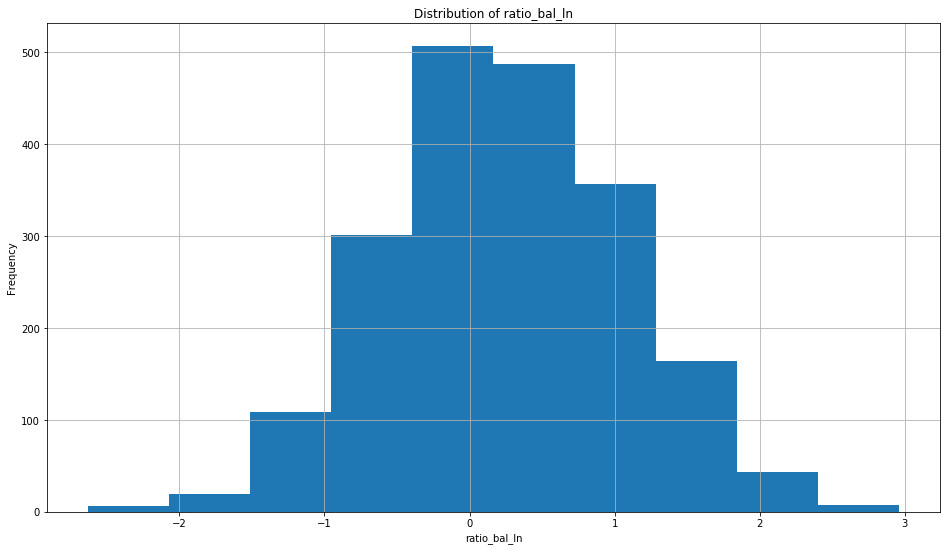

In [7]:
# Make the plots a bit larger so they are easy to read.  Applies to all subsequent plots.
plt.rcParams["figure.figsize"] = (16,9)

# Use Panda's plotting capabilities to display the histogram and title appropriately
dataframe['ratio_bal_ln'].hist()
plt.title('Distribution of ratio_bal_ln')
plt.xlabel('ratio_bal_ln')
plt.ylabel('Frequency')

plt.show()

As suggested by the similarity between Mean and Median, the *ratio_bal_ln* values appear to be uniformly distributed.  This is important as many Machine Learning algorithms assume such a distribution.

For a second univariate numerical plot, let's examine the *balance* attribute.  The quick statistical summary suggested that there might be outliers and that that explain the significant difference between the mean and median values.  A violin plot will simultaneously give us an idea of the distribution of values and the range of outliers.

D:\Masters\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


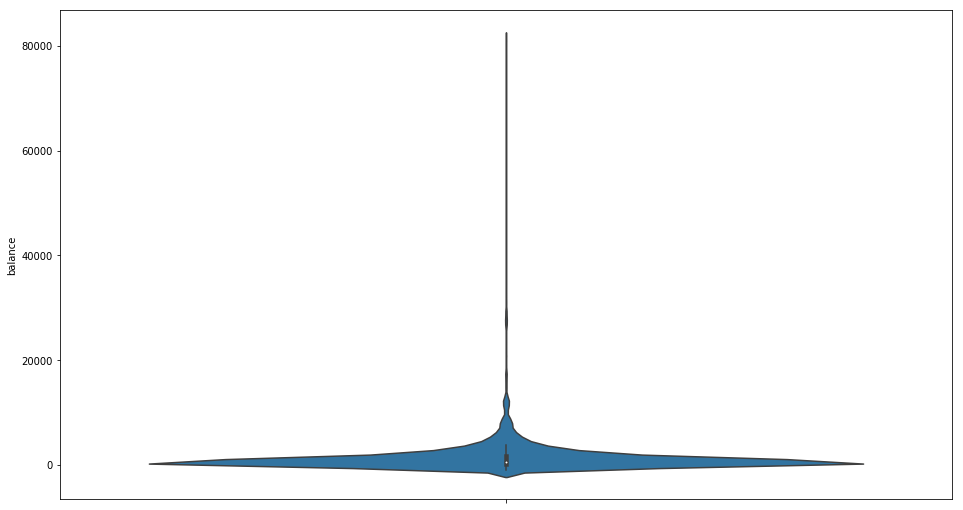

In [8]:
# Violin plot for Balance
# Note that difference between Mean and Median suggested a skew in data
sns.violinplot(y=dataframe['balance'])
plt.show()

The Violin Plot shows a significant range of values.  The concentration of values at < 25% of the range suggests the mean value is being dominated by a small number of very high balance values.  The actual number is not clear form the Violin Plot and a different visualisation might give a better insight.

The plot confirms, however, that some level of normalisation would be required on this attribute for learning as the high values could dominate/skew model learning.


### Categorical Data

For categorical data a Bar Chart is a appropriate to visualise the distribution of values.  The *jobs* attribute has the largest number of unique values so further insight into what they are and their distribution could be informative.


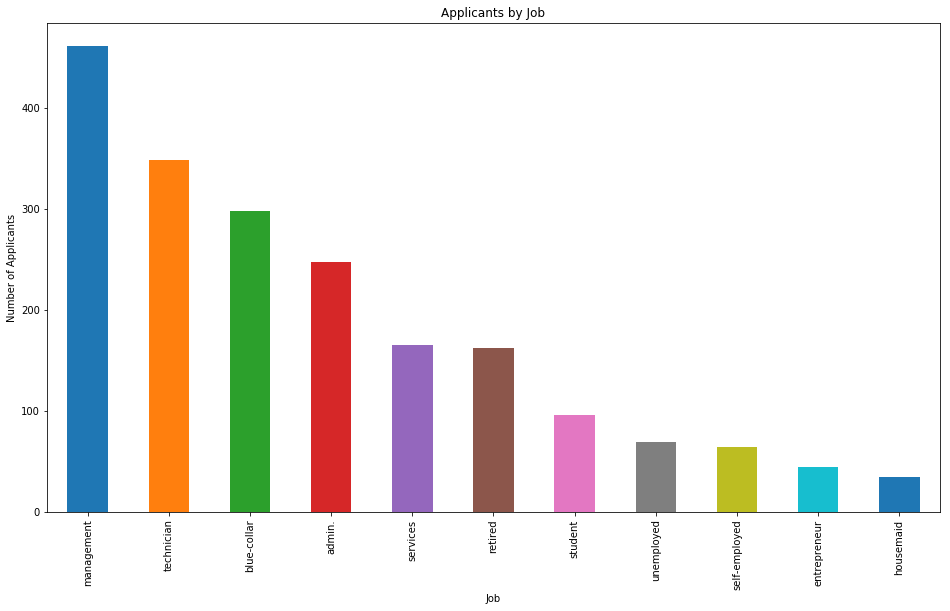

In [9]:
ax = dataframe['job'].value_counts().plot(kind='bar')
plt.title('Applicants by Job')
plt.xlabel('Job')
plt.ylabel('Number of Applicants')

plt.show()

For the *jobs* category, the bar plot shows us that there are 4 job roles that represent over the majority of the applications.  This possibly gives us some insight into the kind of market the bank serves, and may be informative later.

In a similar vein to a bar plot, a pie plot can be a useful mechanism to display a relative distribution of categorical data.

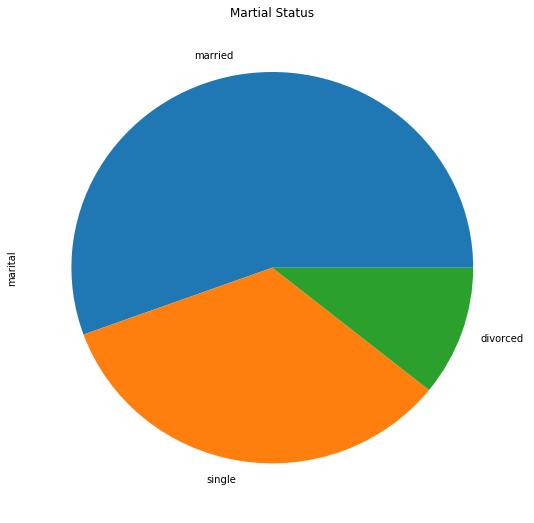

In [10]:
# Temporary square the figure so the pie chart doesn't look skewed.
plt.rcParams["figure.figsize"] = (9,9)

# Pie chart of Martial values
dataframe['marital'].value_counts().plot(kind='pie')
plt.title('Martial Status')

plt.show()

# Reset the figure size
plt.rcParams["figure.figsize"] = (16,9)

The chart clearly shows the majority of customers are married, however it's not clear if this will be informative.  We could also examine the *education* in a similar way.

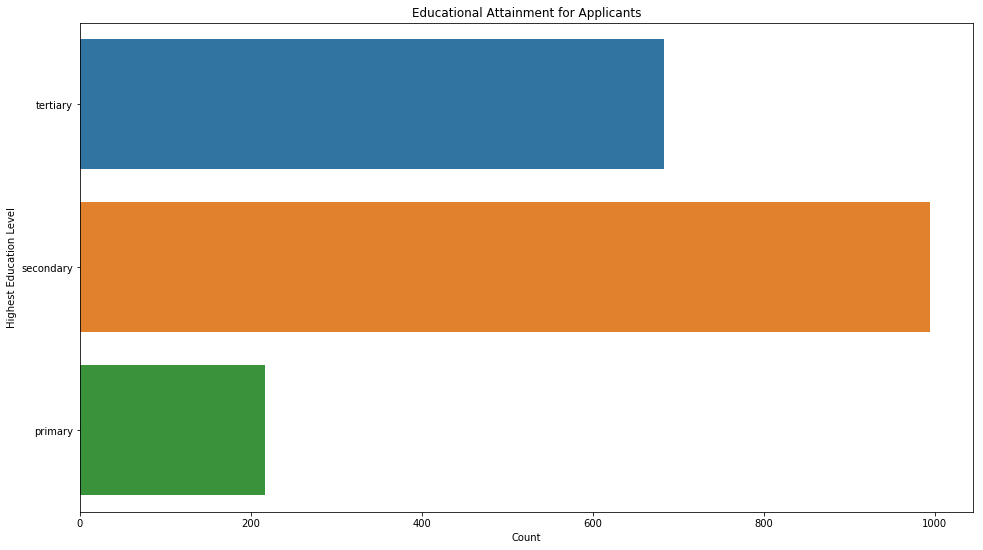

In [11]:
# Show Education status
sns.countplot(y='education', data=dataframe)
plt.title('Educational Attainment for Applicants')
plt.ylabel('Highest Education Level')
plt.xlabel('Count')


plt.show()

Again this value gives us more insight into the kind of customer the bank has, but it's not clear yet if this is relevant.

### Plots of 2 Attributes

Given what we've learned about the job types and education levels, it would be useful to see if there's any correlation between the two.  A useful plot for this type of combined categorical data is a stacked chart.

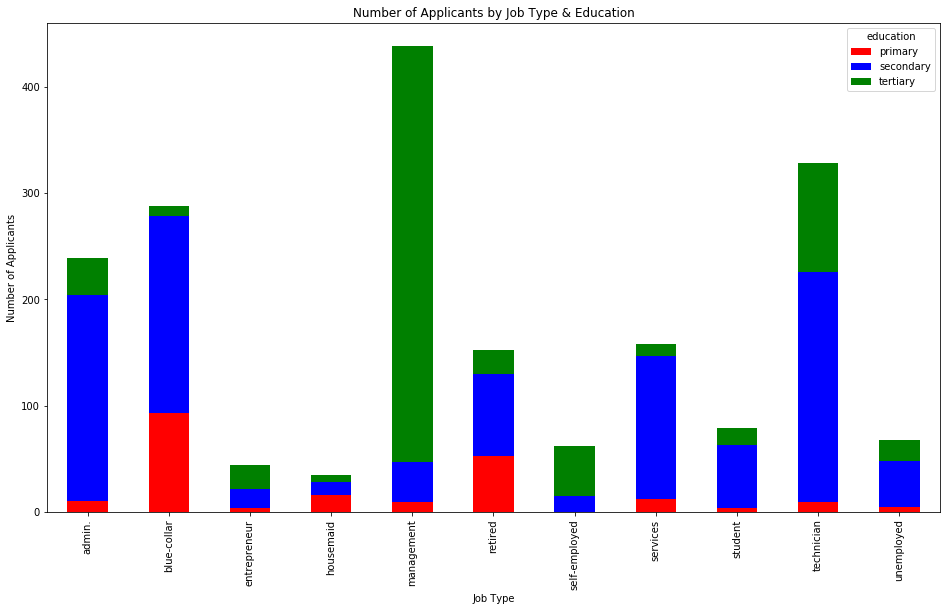

In [12]:
# Combine the education and job values in a pivot-style data frame
stacked = pd.crosstab(dataframe['job'], dataframe['education'])

# Plot the data
stacked.plot(kind='bar', stacked=True, color=['red', 'blue', 'green'])
plt.ylabel('Number of Applicants')
plt.xlabel('Job Type')
plt.title('Number of Applicants by Job Type & Education')

plt.show()

From this plot we can easily visualise the level of educational attainment of the applicants (e.g. low number of primary only) but also easily visualise the distribution of educational levels within each job.

In this case we can determine that while our most of our customers have a secondary education, our biggest single category of customers - management - represent a significant proportion of those with a tertiary education.


While we've examined combinations of categorical data, as it's a bank it would be interesting to determine some financial information about our customers.  We saw already that balances were heavily skewed.  We can examine this to see if what job categories are causing the skew.


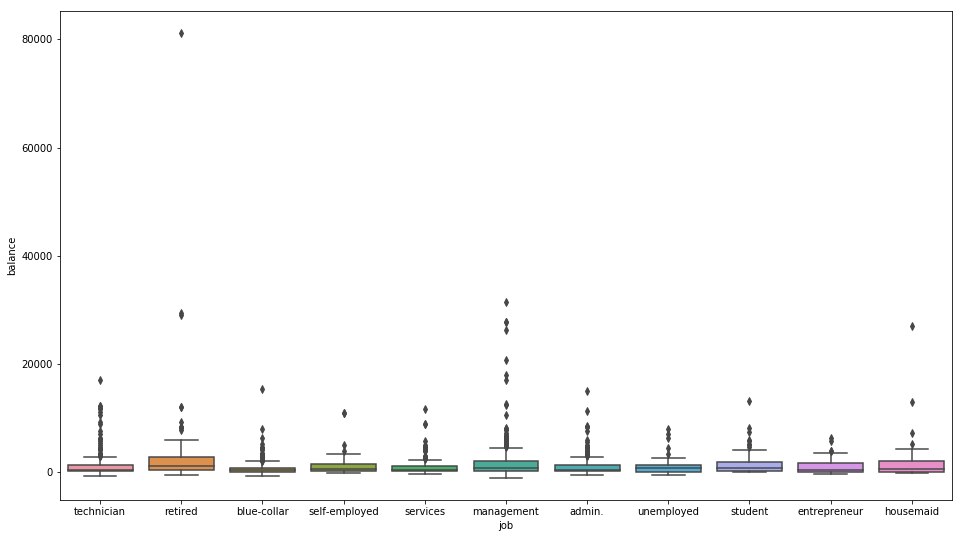

In [13]:
sns.boxplot(x='job', y='balance', data=dataframe)
plt.show()

This combined box plot gives us a greater insight into outliers that were noted earlier when just looking at the balance attribute in isolation.  From this plot we learn some useful information, some of which is surprising:

 - Despite the differences in job type the median, 1st and 3rd quartile values are highly similar across all categories.
 - The similarity is more surprising as we'd assume management earn higher salaries than others (e.g. mgmt vs. unemployed).<br> The relatively frequent outliers for *management job* would suggest this.
 - The *balance* figure is indeed being skewed heavily by relatively few (or one) large balance belonging to a retiree.

With a plot that combines attributes such as this, we gain an insight that might cause us to treat outliers differently, e.g. simple removal of that individual sample as it is in a category that we may not be focused on.

Also, I noted earlier that the number of job categories suggested some previous summarisation of data. This box plot suggests that perhaps that data is too coarsely summarised because:

 - The management role appears to have more outliers than other job types
 - The range of the outliers (while not as heavily skewing as others) suggests a class of customers that tend to have a higher balance
 - Other studies (academic or industry) suggest that a tertiary education leads to substantially higher earning power.<br>
 
It's possible that either all these customers are keep low balances at this bank, or we define the category broadly.  A review of the underlying data might be useful.

### Numerical associations

One of the most usual ways to determine an association between variables is a pair plot.

D:\Masters\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


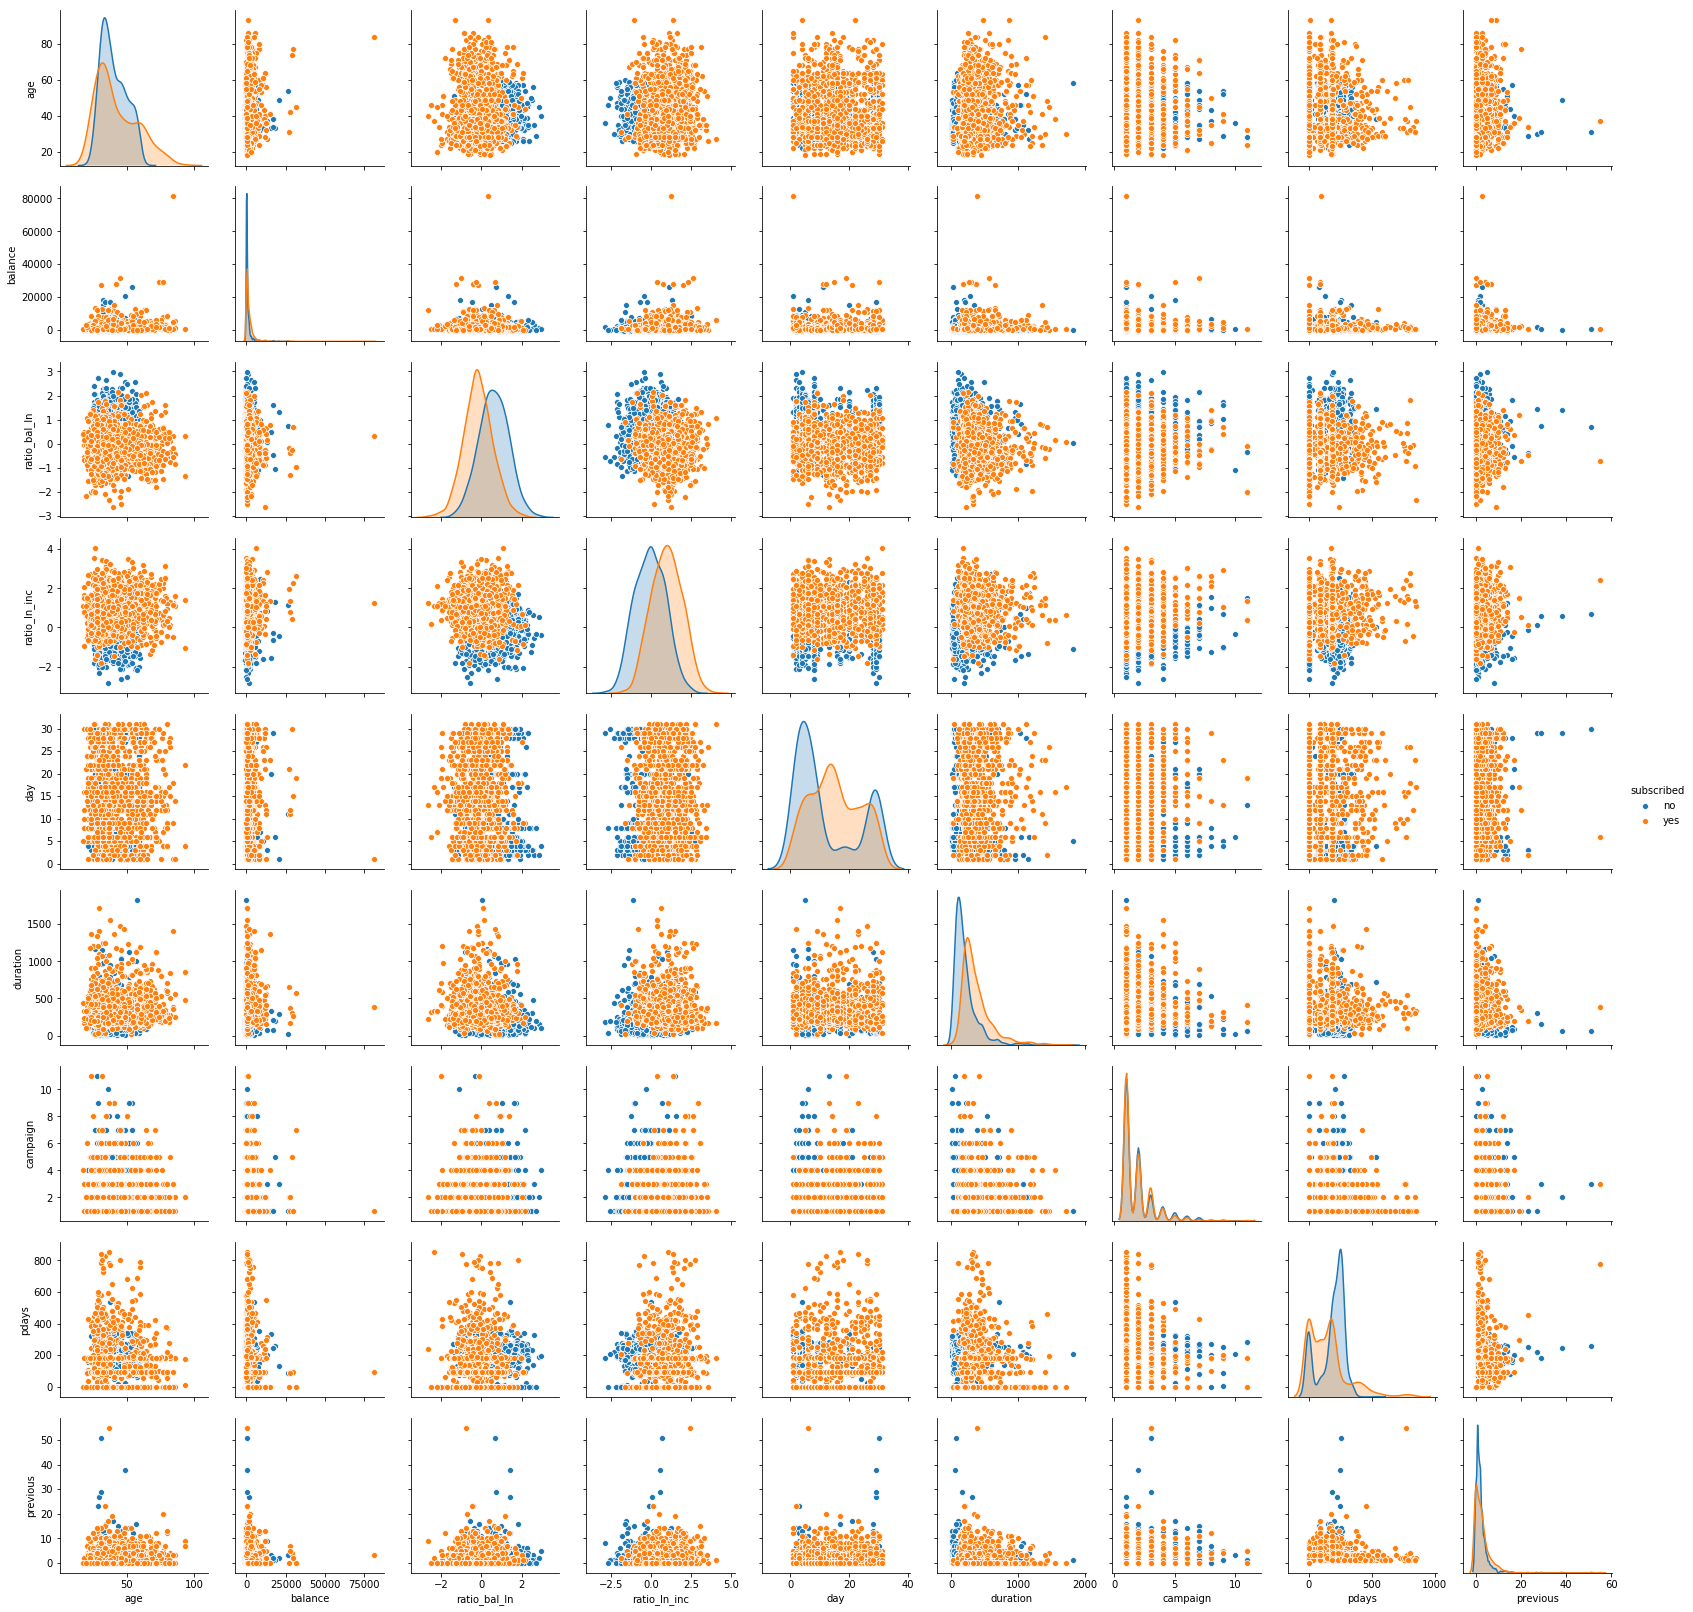

In [14]:
sns.pairplot(dataframe, hue='subscribed')
plt.show()

This pairplot doesn't seem to show any perfectly seperable data.  It does suggest a coupe of things which I'll explore below.

### Predictive Variables

Looking at the numeric variables and the plot above to find what might be a useful predictor, many of them appear to be ambiguous:

 - *ratio_inc_ln* is not clearly linked to other attributes.  There is no income figure and no loan figure on which to base a hypothesis.
 - *duration* and *pdays* have no obvious definition
 - *campaign* appears categorical in nature
 - In the absence of a year, the *days* attribute doesn't allow us to infer anything about day of week, and could represent any time
  - *previous* may be a counter but in the absence of a description doesn't appear to be indicative of much.
 
 
With that in mind let's plot the remaining variables: *age*, *ratio_bal_ln* and *balance*.  The pairplot doesn't offer much hope for balance but two reasonable views of balance would be that it is a proxy for how much business the customer does with the bank, or how much a customer can afford additional offerings (e.g. a loan).
 

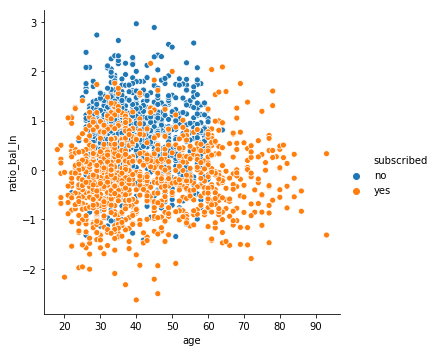

In [15]:
# Use a scatter plot to visualise the relationships
sns.relplot(x='age', y='ratio_bal_ln', hue='subscribed', data=dataframe)
plt.show()

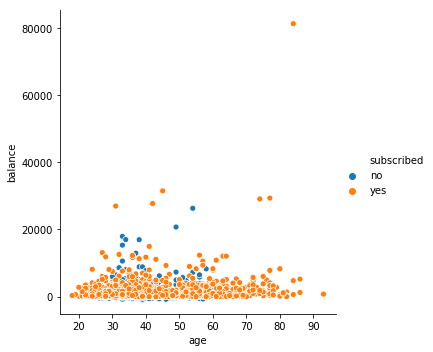

In [16]:
sns.relplot(x='age', y='balance', hue='subscribed', data=dataframe)
plt.show()

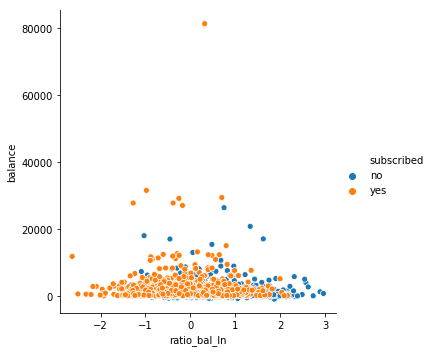

In [17]:
sns.relplot(x='ratio_bal_ln', y='balance', hue='subscribed', data=dataframe)
plt.show()

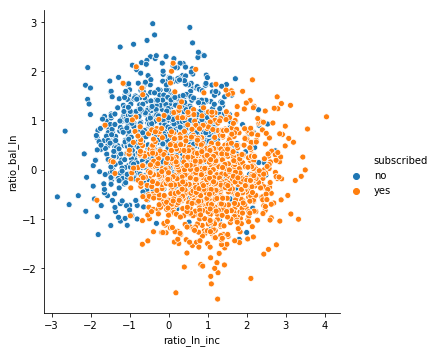

In [18]:
# Use a scatter plot to visualise the relationships
sns.relplot(x='ratio_ln_inc', y='ratio_bal_ln', hue='subscribed', data=dataframe)
plt.show()

The plots above confirm that balance is not a good predictor of the *subscribed* output.  This is in line with the earlier observation that the balances are [unusually] similar across all job categories.

My initial selection of *age* and *ratio_bal_ln* does appear to show some useful separation, but with quite a lot of overlap.

As some other student peers had suggested using *ratio_ln_inc* and *ratio_bal_ln* I was curious to see the relationship.  However, as noted above, I'm not clear on the meaning of *ratio_ln_inc* so I will stick with my initial view.  It does, however, illustrate the importance of being open to previously rejected possibilities.

## Task 3

A perceptron can be used to perform 2-class classification by identifying a function that will map a set of attributes from a 
data set to one of 2 values (the classes). 

In the context of the selections above, the Perceptron would attempt to identify a  function that successfully maps the values of **_age_** and __*ratio_bal_ln*__ to the target attribute **_subscribed_**.  All of the possible values of these attributes and their combinations represent the **_Input space_** to the function.  The number of attributes defines the dimensionality of the input set.   All of the possible values of _subscribed_ would represent the **_Output space_**.  As this is a 2-class classification the output space is 1-dimensional  with two values ('yes'/'no').

The sample **_Data Set_** is a subset of the _Input space_ and contains the value of each attribute for a number of observations.  

Theoretically there a single **_unknown target function_** that perfectly maps the values of _age_ and *ratio_bal_ln* from the input space to the output space.  Generally though there is a set of potential functions that might perform this mapping.  The functions we choose to use test form the **_Hypothesis set_** of the problem.  Each set of weights calculated by the Perceptron represents an element of the _Hypothesis set_.   The role of the Perceptron is to narrow down the Hypothesis set and select a **_Final Hypothesis_** that approximates the _unknown target function_ as closely as possible, given limits on the size of the Data and Hypotheses sets.


To determine the _Final Hypothesis_ the Perceptron evaluates each hypothesis based on the number of prediction errors in the data set.  These **_In-sample Errors_** are reduced by adjusting the weights and bias the Perceptron applies to the _Data set_.  

Ultimately the usefulness of the _Final Hypothesis_ is the **_Out-of-sample_** error rate, or the probability that it will incorrectly classify unseen data from the _Input space_.  Practically, training has to be limited to a data set but we can use the **_Hoeffding Inequality_** to infer the _Out-of-sample_ error and bound the difference between in- and out-of-sample errors.  

This provides a means to determine the accuracy of a given hypothesis, or inversely to determine who many samples are required to reach a certain level of accuracy.

## Task 4

Suggestion: try PLA on this dataset before using the bank dataset

In [19]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2)
y = [yy if yy == 1 else -1 for yy in y] 

In [20]:
def h(x,w):
    #Perceptron model: the sign of the dot product of weights and input vector determines the class allocation
    bias = np.array([1])
    return np.sign(w.T.dot(np.concatenate((bias,x))))

In [21]:
def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [22]:
def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

In [23]:
def pla(training_in, training_out, weights):
    bias = np.array([1])
    iterations=0
    while True:
        errors = 0;
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):
                iterations+=1;
                weights = weights + y*(np.concatenate((bias,x)))
                errors+=1;
        if (errors == 0):
            break
    return weights, iterations

In [24]:
def calc_error(training_in, training_out, weights):
    # Calculate the classification error as the fraction of training samples that are misclassified
    errors=0
    for x,y in zip(training_in, training_out):
        if (h(x,weights)!=y):
            errors+=1;
    return errors/len(training_in)

### Test provided PLA algorithm


Before testing the algorithm it's worth visualising the data.

In [25]:
# Convert Blob data to a data frame for visualisation
tf = pd.concat([pd.DataFrame(X, columns=['X1', 'X2']), pd.DataFrame(y, columns=['y'])], axis=1)
tf.head()

,X1,X2,y
0,1.930311,1.762614,-1
1,3.781953,1.516848,-1
2,4.352341,8.946479,1
3,5.426234,9.861031,1
4,1.353335,0.903950,-1


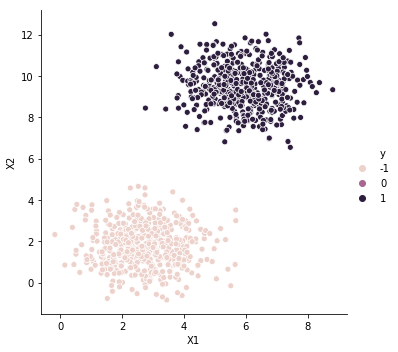

In [26]:
sns.relplot(x='X1', y='X2', hue='y', data=tf)
plt.show()

The data is linearly separable so the PLA algorithm will converge.

In [27]:
# Need to intialise 3 weight values, because we have x0 too.
# Could initialise to random values, or just random here
weights=np.array([0.2, 0.4, 0.05])

X_train, X_test, y_train, t_test = train_test_split(X, y, test_size=0.2, random_state=42)

g_weights, iterations = pla(X_train, y_train, weights)

print(f"Final weights:\t{g_weights}")
print(f"Iterations:\t{iterations}")

Final weights:	[-35.8         -1.4036033    8.25158194]
Iterations:	74


The data is clearly linearly seperable, so it is not immensely surprising that a boundary can be found relatively quickly.  In tests have seen values from 0 (first pass) to 74 seen here.  

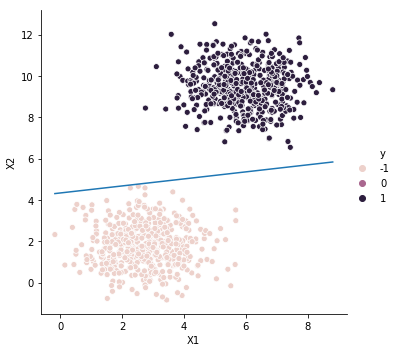

In [28]:
x_min = tf['X1'].min()
x_max = tf['X1'].max()

# Calculate the decision boundary
y_min, y_max = decision_boundary(g_weights, x_min, x_max)

# Plot the data and the boundary
sns.relplot(x='X1', y='X2', hue='y', data=tf)
plt.plot([x_min, x_max], [y_min, y_max])

plt.show()

### Bank Data

The bank data clearly will not work with the standard PLA algorithm as the data is not linearly seperable.  As a result the error will never reach 0, so the algorithm will not terminate.  

To deal with this we modify it to use the Pocket Algorithm, which contains 2 changes:

 - Stores the best weight seen by the algorithm
 - Returns after a specified number of iterations
 
This ensures that some results is returned.

In [36]:
# Goal is minimal change to the pocket algorithm
def pocket_pla(training_in, training_out, weights, max_iterations):
    bias = np.array([1])
    iterations=0
    
    # Initialise best weights and lowest observed error
    best_weights = np.zeros(weights.shape)
    lowest_error = 1.0
    
    iterations = 0
    while iterations < max_iterations:
        iterations+=1
        errors = 0
        
        # Iterate over all loops
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):      
                # Update our best observed weights
                error = calc_error(training_in, training_out, weights)
                if error < lowest_error:
                    lowest_error = error
                    best_weights = weights
                    
                weights = weights + y*(np.concatenate((bias,x)))
                errors+=1;
                
        # This is still a valid exit.  If we had no errors then we have lowest_error and best_weights
        # and don't need to continue
        if (errors == 0):
            break
            
    return best_weights, iterations

Before running the modified algorithm against the data, the subscribed values need to be converted to a representation of +1 or -1 as the sign determines whether or not $h(x)$ is correct.  

In [ ]:
# Convert the subscribed values to +1 or -1
subscribed = [1 if subval == 'yes' else -1 for subval in dataframe['subscribed'].values] 

# Create a new dataframe with the relevant attributes and target
bank_pla_df = pd.concat([dataframe[['age', 'ratio_bal_ln']], pd.DataFrame(subscribed, columns=['subscribed'])], axis=1)
bank_pla_df.head()

In [52]:
bank_train, bank_test, sub_train, sub_test = train_test_split(bank_pla_df[['age', 'ratio_bal_ln']].values, bank_pla_df['subscribed'].values, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
weights=np.array([0.2, 0.4, 0.05])

g_weights, iterations = pocket_pla(bank_train, sub_train, weights, 1000)

print(f"Final weights:\t{g_weights}")
print(f"Iterations:\t{iterations}")